In [1]:
!git clone https://github.com/instance01/qubo-nn.git

Cloning into 'qubo-nn'...
remote: Enumerating objects: 3194, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (187/187), done.
remote: Total 3194 (delta 129), reused 157 (delta 54), pack-reused 2952
Receiving objects: 100% (3194/3194), 129.75 MiB | 34.08 MiB/s, done.
Resolving deltas: 100% (1957/1957), done.


In [2]:
%%bash
cd qubo-nn/
pip3 install -r requirements.txt
pip3 install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ml-pyxis: filename=ml_pyxis-0.4.dev0-py3-none-any.whl size=12558 sha256=7e1266057fe2dd0333f2a15f6901ee718f6d325235215ad69a2ff608a29e4d3e
  Stored in directory: /tmp/pip-ephem-wheel-cache-kmdndx8j/wheels/4e/4a/72/3fe0634a2ccbc58031ec6e2a39798f23cef30f7e7e4ce8dbab
Successfully built ml-pyxis
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/qubo-nn
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=cb3472e9cff1a9c954eb68bd230e2f925712f88a4a37c2c3d8113dc429e960b7
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
  Runn

In [24]:
!cd qubo-nn/qubo_nn && python3 -m qubo_nn.main -t reverse -c tsp1 --gendata
!cd qubo-nn/qubo_nn && python3 -m qubo_nn.main -t reverse -c tsp1 --train -n 1

<class 'qubo_nn.problems.tsp.TSP'> (10000, 64, 64)
TOTAL DATA LEN 10000
(10000, 64, 64) (10000,) (10000, 65)
NORM? True 1.0
use norm multiply? False
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
{'use_norm_multiply': False, 'use_norm_divide': False, 'norm_multiply': 1.0, 'activation': 'ReLU', 'class_weights': [], 'no_norm': False, 'norm_data': False, 'shuffle_data': True, 'network': 'FC', 'n_epochs': 100, 'batch_size': 500, 'optimizer': 'sgd', 'optimizer_sgd_momentum': 0.9, 'lr': 0.001, 'fc_sizes': [], 'train_eval_split': 0.9, 'gen_edges': False, 'use_norm_multiply_input': False, 'pa

In [20]:
%%bash
python3
import shutil
import matplotlib
shutil.rmtree(matplotlib.get_cachedir())

In [ ]:
%%bash
python3
import matplotlib.font_manager as fm
for font in fm.fontManager.ttflist:
  print(font)

In [23]:
#!cd qubo-nn/qubo_nn && python3 -m qubo_nn.main -t classify -c tsp1 --gendata
!cd qubo-nn/qubo_nn && python3 -m qubo_nn.main -t classify -c tsp1 --train
#!cd qubo-nn/qubo_nn && python3 -m qubo_nn.main -t classify -c 2 --eval -m models/21-02-16_20\:28\:42-9893713-instances-MacBook-Pro.local-2 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Traceback (most recent call last):
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/content/qubo-nn/qubo_nn/main.py", line 36, in <module>
    c.run_experiment(args.nruns)
  File "/content/qubo-nn/qubo_nn/pipeline.py", line 176, in run_experiment
    optimizer = Optimizer(self.cfg, lmdb_loader, self.logger)
  File "/content/qubo-nn/qubo_nn/nn/models.py", line 366, in __init__
    self.net.paramet

In [62]:
# set integers C
C = [2, 10, 3, 8, 5, 7, 9, 5, 3, 2]
N = len(C)

In [63]:
# set the above Q_{ii} & Q_{ij} as a dictionary type such as {(i, j): Q_{ij}}
Q = {}
for i in range(N):
    Q[i, i] = 4 * C[i] * (C[i] - sum(C))
    for j in range(i + 1, N):
        Q[i, j] = 8 * C[i] * C[j]

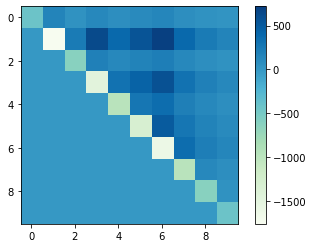

In [89]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

def show_qubo(qubo, cmap=cm.GnBu, save_path=None):
    n_qubo = max(sorted(qubo.keys())[-1][0], sorted(qubo.keys(), key=lambda x: x[1])[-1][1]) + 1

    np_qubo = np.zeros((n_qubo, n_qubo))
    for (pos_x, pos_y), coeff in qubo.items():
        np_qubo[pos_x][pos_y] = coeff

    plt.imshow(np_qubo, cmap=cmap)
    plt.colorbar()
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()

show_qubo(Q)

In [66]:
#ising model
# set h_i & J_ij
h = {}
J = {}
for i in range(N):
    h[i] = 0
    for j in range(i + 1, N):
        J[i, j] = 2 * C[i] * C[j]

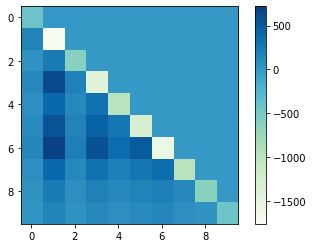

In [88]:
import dimod

# convert from ising model to QUBO
model = dimod.BinaryQuadraticModel(h, J, 0.0, vartype='SPIN')
qubo, offset = model.to_qubo()
show_qubo(qubo)

D-wave implement

In [ ]:
!pip install dwave-ocean-sdk

In [ ]:
!git clone https://github.com/dwavesystems/dwave-ocean-sdk.git
!cd dwave-ocean-sdk && python setup.py install

In [113]:
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
from dwave.system.samplers import LeapHybridSampler

# set the connection information as an option
endpoint = 'https://cloud.dwavesys.com/sapi'
token = 'DEV-'
solver = 'DW_2000Q_6'  ## QPU solver
## list of solvers
##QPU
# DW_2000Q_6
##Hybrid
# hybrid_binary_quadratic_model_version2
# hybrid_constrained_quadratic_model_version1
# hybrid_discrete_quadratic_model_version1

# use DWaveSampler
dw = DWaveSampler(endpoint=endpoint, token=token, solver=solver) # client='base' use for hybrid solver

# embed to Chimera graph
sampler = EmbeddingComposite(dw)


# in the case of ising model, use the following
response = sampler.sample_ising(h, J, num_reads=100)

# in the case of QUBO, use the following
# response = sampler.sample_qubo(Q, num_reads=100)

response.record


rec.array([([-1,  1,  1, -1,  1,  1, -1, -1, -1,  1], -370., 3, 0.1),
           ([ 1, -1, -1,  1, -1, -1,  1,  1,  1, -1], -370., 4, 0.1),
           ([ 1,  1,  1, -1,  1,  1, -1, -1, -1,  1], -354., 1, 0.1),
           ([ 1, -1, -1,  1, -1, -1,  1,  1, -1, -1], -334., 1, 0.1),
           ([ 1,  1, -1,  1, -1, -1, -1,  1,  1, -1], -366., 1, 0.1),
           ([-1, -1,  1, -1,  1,  1,  1, -1, -1,  1], -366., 1, 0.1),
           ([ 1, -1,  1, -1,  1,  1,  1, -1, -1,  1], -366., 2, 0.1),
           ([-1,  1, -1,  1, -1, -1, -1,  1,  1, -1], -366., 2, 0.1),
           ([ 1,  1, -1,  1, -1,  1, -1, -1, -1, -1], -370., 1, 0. ),
           ([-1, -1,  1,  1, -1, -1,  1,  1, -1,  1], -370., 1, 0. ),
           ([-1,  1, -1,  1, -1,  1, -1, -1, -1,  1], -370., 1, 0. ),
           ([ 1,  1,  1, -1, -1,  1, -1,  1, -1, -1], -370., 1, 0. ),
           ([-1,  1, -1, -1,  1,  1, -1,  1, -1, -1], -370., 1, 0. ),
           ([-1, -1, -1,  1, -1, -1,  1,  1,  1,  1], -370., 1, 0. ),
           ([ 1,  1,

In [74]:
def calcurate_energy(solution, vartype='BINARY'):
    if vartype == 'BINARY':
        ene = sum(C) ** 2  # offset
        for i in range(N):
            ene += Q[i, i] * solution[i]
            for j in range(i + 1, N):
                ene += Q[i, j] * solution[i] * solution[j]
    elif vartype == 'SPIN':
        ene = sum(C[i] ** 2 for i in range(N))
        for i in range(N):
            for j in range(i + 1, N):
                ene += J[i, j] * solution[i] * solution[j]
    else:
        raise ValueError("vartype mast be 'BINARY' or 'SPIN'.")

    return ene

# count the number of optimal solution
num_optimal_sol = 0
optimal_sol = []
twenty_sol = []
for state in response.record:
    # 0th contains a list of state, 2nd contains the number of occurrences in .record
    solution = state[0]
    num_oc = state[2]
    # compute energy
    energy = calcurate_energy(solution, vartype='SPIN')
    # count up the times when the energy is zero
    if energy == 0.0:
        num_optimal_sol += num_oc
        optimal_sol.append(solution)
    # preserve a result of 20 µs (we use later)
    twenty_sol.append(solution)

num_optimal_sol

13

In [75]:
for solution in optimal_sol:
    group_A = [C[i] for i, s in enumerate(solution) if s==1]
    group_B = [C[i] for i, s in enumerate(solution) if s==-1]
    print(solution)
    print('Group A: ', group_A, ', Sum = ', sum(group_A))
    print('Group B: ', group_B, ', Sum = ', sum(group_B))

[-1 -1  1 -1  1 -1  1  1  1  1]
Group A:  [3, 5, 9, 5, 3, 2] , Sum =  27
Group B:  [2, 10, 8, 7] , Sum =  27
[ 1  1 -1 -1 -1  1 -1  1  1 -1]
Group A:  [2, 10, 7, 5, 3] , Sum =  27
Group B:  [3, 8, 5, 9, 2] , Sum =  27
[-1  1  1 -1  1  1 -1 -1 -1  1]
Group A:  [10, 3, 5, 7, 2] , Sum =  27
Group B:  [2, 8, 9, 5, 3] , Sum =  27
[ 1  1  1 -1 -1  1 -1 -1  1  1]
Group A:  [2, 10, 3, 7, 3, 2] , Sum =  27
Group B:  [8, 5, 9, 5] , Sum =  27
[-1  1 -1 -1  1  1 -1 -1  1  1]
Group A:  [10, 5, 7, 3, 2] , Sum =  27
Group B:  [2, 3, 8, 9, 5] , Sum =  27
[-1  1 -1 -1 -1  1 -1  1  1  1]
Group A:  [10, 7, 5, 3, 2] , Sum =  27
Group B:  [2, 3, 8, 5, 9] , Sum =  27
[ 1  1 -1 -1  1 -1 -1  1  1  1]
Group A:  [2, 10, 5, 5, 3, 2] , Sum =  27
Group B:  [3, 8, 7, 9] , Sum =  27
[-1  1  1 -1 -1 -1  1  1 -1 -1]
Group A:  [10, 3, 9, 5] , Sum =  27
Group B:  [2, 8, 5, 7, 3, 2] , Sum =  27
[-1  1 -1  1 -1 -1  1 -1 -1 -1]
Group A:  [10, 8, 9] , Sum =  27
Group B:  [2, 3, 5, 7, 5, 3, 2] , Sum =  27
[ 1  1 -1 -1  1  1 

In [76]:
response.data_vectors

{'energy': array([-174., -174., -270., -270.,  -46., -306., -306., -174., -174.,
        -370., -370., -370., -370., -370., -370., -370., -370., -370.,
        -370., -370., -370., -366., -366., -366., -366., -366., -366.,
        -354., -354., -354., -354., -354., -354., -354., -334., -334.,
        -334., -334.,   30., -114., -354., -306., -306., -306., -306.,
        -306., -306., -306., -306., -174.]),
 'num_occurrences': array([26, 11,  3,  5,  3,  2,  5,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]),
 'chain_break_fraction': array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1,
        0.1, 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1])}

In [77]:
response.info

{'timing': {'qpu_sampling_time': 23894.0,
  'qpu_anneal_time_per_sample': 20.0,
  'qpu_readout_time_per_sample': 198.4,
  'qpu_access_time': 34680.1,
  'qpu_access_overhead_time': 1141.9,
  'qpu_programming_time': 10786.1,
  'qpu_delay_time_per_sample': 20.54,
  'post_processing_overhead_time': 2680.0,
  'total_post_processing_time': 2680.0},
 'problem_id': 'f8ddfbf6-420c-4b5c-af09-e87e6cd28e45'}

In [78]:
#Change the number of reading

# in the case of ising model, use the following
response = sampler.sample_ising(h, J, num_reads=1000)

# in the case of QUBO, use the following
# response = sampler.sample_qubo(Q, num_reads=1000)

# count up the number of occurrences of optimal solution
num_optimal_sol = 0
optimal_sol = []
for state in response.record:
    # 0th is a list of states, 2nd is the number of occurrence in .record
    solution = state[0]
    num_oc = state[2]
    # compute energy
    energy = calcurate_energy(solution, vartype='SPIN')
    # count up the times when the energy is zero
    if energy == 0.0:
        num_optimal_sol += num_oc
        optimal_sol.append(solution)

num_optimal_sol

56

In [79]:
response.info

{'timing': {'qpu_sampling_time': 238940.0,
  'qpu_anneal_time_per_sample': 20.0,
  'qpu_readout_time_per_sample': 198.4,
  'qpu_access_time': 249734.5,
  'qpu_access_overhead_time': 1337.5,
  'qpu_programming_time': 10794.5,
  'qpu_delay_time_per_sample': 20.54,
  'post_processing_overhead_time': 4073.0,
  'total_post_processing_time': 4073.0},
 'problem_id': 'ce5b3fa1-b5e6-43d3-8d9b-9f5d6b27d655'}

In [80]:
#Change annealing time

# In the case of ising model, use the following
response = sampler.sample_ising(h, J, num_reads=100, annealing_time=50)

# In the case of QUBO, use the following
# response = sampler.sample_qubo(Q, num_reads=100, annealing_time=50)

# count up the number of times the optimal solution was found
num_optimal_sol = 0
optimal_sol = []
fifty_sol = []
for state in response.record:
    # 0th contains a list of states, 2nd contains the number of occurrences of states in .record
    solution = state[0]
    num_oc = state[2]
    # compute energy
    energy = calcurate_energy(solution, vartype='SPIN')
    # count up when the energy is 0
    if energy == 0.0:
        num_optimal_sol += num_oc
        optimal_sol.append(solution)
    # preserve a result of 50µs
    fifty_sol.append(solution)

num_optimal_sol

27

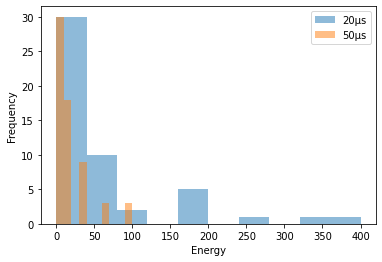

In [81]:
plt.hist([calcurate_energy(solution, vartype='SPIN') for solution in twenty_sol], alpha=0.5, label='20μs')
plt.hist([calcurate_energy(solution, vartype='SPIN') for solution in fifty_sol], alpha=0.5, label='50μs')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.legend()
plt.show()